In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/content/drive/MyDrive/AI/DL/fake-news/train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [3]:
X = df.drop('label',axis=1)
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [4]:
y = df['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [5]:
df.shape

(20800, 5)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer

In [7]:
df = df.dropna()

In [8]:
df.shape

(18285, 5)

In [9]:
messages = df.copy()

In [10]:
messages.reset_index(inplace=True)

In [11]:
from nltk.corpus import stopwords

In [12]:
from nltk.stem.porter import PorterStemmer

In [13]:
ps = PorterStemmer()

In [14]:
import re

In [15]:
import nltk

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
corpus = []
for i in range(0,len(messages)):
  review = re.sub("[^a-zA-Z]", " ", messages['title'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word not in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [18]:
messages['title']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
18280    Rapper T.I.: Trump a ’Poster Child For White S...
18281    N.F.L. Playoffs: Schedule, Matchups and Odds -...
18282    Macy’s Is Said to Receive Takeover Approach by...
18283    NATO, Russia To Hold Parallel Exercises In Bal...
18284                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [19]:
messages

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [20]:
corpus

['we didn t s until it',
 'on',
 'whi the you',
 'in have been',
 'for about to for',
 'if he over of',
 't s the',
 'a for and of the',
 's for with to s',
 'of',
 'in the',
 'no between and',
 're there are on and',
 'in a and the',
 'down the',
 'to at the',
 'in on',
 'did a',
 'for',
 'is',
 'in on the',
 'and the a to',
 'to the',
 'to what befor',
 'of for the',
 'how a the',
 'to you just',
 'have won and the',
 'from but are the',
 'for for the',
 'to s as the',
 're whi we are in the until',
 'not s',
 's on',
 'to an is a for most the',
 'of',
 'of the of that aren t',
 'by and other the',
 'to out s',
 'the of at the',
 'on and s',
 'after the',
 'on the s will be',
 'an',
 'more than of by',
 'the will more',
 'to the',
 'and a',
 'if the it will be the in',
 'as to the',
 'the of a the',
 'i what will be the after the',
 'of s in the',
 '',
 'for a by the',
 's had no on s',
 'all not of',
 'as into',
 'will at the',
 'what the won t is a',
 'how to from',
 'to',
 'a what

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))

In [23]:
X = cv.fit_transform(corpus).toarray()

In [24]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
X.shape

(18285, 5000)

In [26]:
y = messages['label']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [29]:
len(cv.get_feature_names())

5000

In [30]:
cv.get_feature_names()

['about',
 'about after',
 'about and',
 'about and the',
 'about as',
 'about at',
 'about be',
 'about becaus',
 'about becaus doesn',
 'about by',
 'about from',
 'about from that',
 'about her',
 'about hi',
 'about him',
 'about how',
 'about in',
 'about is',
 'about it',
 'about more',
 'about not',
 'about of',
 'about on',
 'about our',
 'about that',
 'about the',
 'about the in',
 'about the of',
 'about the the',
 'about their',
 'about thi',
 'about to',
 'about to for',
 'about to the',
 'about to to',
 'about to with',
 'about what',
 'about with',
 'about your',
 'abov',
 'after',
 'after about',
 'after again',
 'after all',
 'after an',
 'after an the',
 'after and',
 'after and in',
 'after and the',
 'after are',
 'after as',
 'after at',
 'after be',
 'after by',
 'after down',
 'after for',
 'after for the',
 'after from',
 'after he',
 'after her',
 'after her wa',
 'after hi',
 'after in',
 'after in the',
 'after into',
 'after is',
 'after is the',
 'after of'

In [31]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [32]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head(5)

,about,about after,about and,about and the,about as,about at,about be,about becaus,about becaus doesn,about by,about from,about from that,about her,about hi,about him,about how,about in,about is,about it,about more,about not,about of,about on,about our,about that,about the,about the in,about the of,about the the,about their,about thi,about to,about to for,about to the,about to to,about to with,about what,about with,about your,abov,...,your are,your are just,your as,your be,your by,your by that,your for,your for the,your from,your from the,your how,your if,your if you,your in,your in of,your is,your is the,your more,your not,your now,your of,your of the,your off,your on,your over,your own,your own the,your the,your thi,your to,your to the,your when,your when you,your whi,your whi it,your with,your you,your your,yourself,yourself now
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
import numpy as np


In [34]:
import matplotlib.pyplot as plt


In [35]:
def plot_confusion_matrix(cm, classes, normalize=False, title = 'Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print('Normlized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  thres = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j] > thres else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
classifier = MultinomialNB()

In [38]:
from sklearn import metrics
import itertools

In [39]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
pred = classifier.predict(X_test)

In [41]:
metrics.accuracy_score(y_test,pred)

0.6546810273405137

In [42]:
cm = metrics.confusion_matrix(y_test, pred)

Confusion matrix without normalization


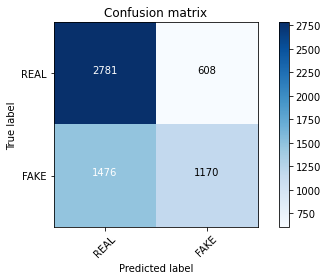

In [43]:
plot_confusion_matrix(cm, ['REAL', 'FAKE'], normalize=False)

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [45]:
pac = PassiveAggressiveClassifier()

In [ ]:
pac.fit(X_train, y_train)

In [47]:
pred = pac.predict(X_test)

In [48]:
metrics.accuracy_score(y_test, pred)

0.6458989229494615

In [49]:
cm = metrics.confusion_matrix(y_test,pred)

Confusion matrix without normalization


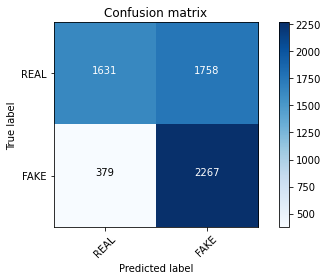

In [50]:
plot_confusion_matrix(cm,['REAL','FAKE'])

In [51]:
clf = MultinomialNB(alpha=0.1)

In [52]:
previous_score=0
for alpha in np.arange(0,1,.1):
  sub_clf = MultinomialNB(alpha=alpha)
  sub_clf.fit(X_train, y_train)
  pred = sub_clf.predict(X_test)
  if metrics.accuracy_score(y_test, pred) > previous_score:
    clf = sub_clf
  print("Alpha {}, Score {}".format(alpha,metrics.accuracy_score(y_test, pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha 0.0, Score 0.644076222038111
Alpha 0.1, Score 0.6531897265948633
Alpha 0.2, Score 0.6553438276719138
Alpha 0.30000000000000004, Score 0.656006628003314
Alpha 0.4, Score 0.6531897265948633
Alpha 0.5, Score 0.6541839270919635
Alpha 0.6000000000000001, Score 0.6546810273405137
Alpha 0.7000000000000001, Score 0.6543496271748136
Alpha 0.8, Score 0.6548467274233637
Alpha 0.9, Score 0.6540182270091135


In [ ]:
feature_names = cv.get_feature_names()
feature_names

In [55]:
clf.coef_[0]

array([ -5.27716907, -10.54674396,  -8.85214824, ..., -10.54674396,
        -8.14884869,  -9.37667271])

In [56]:
sorted(zip(clf.coef_[0],feature_names), reverse=True)[:20]

[(-2.8751241942262737, 'the'),
 (-3.1886918538093028, 'to'),
 (-3.4849332473038865, 'of'),
 (-3.6390998017848792, 'in'),
 (-3.8976154975045, 'on'),
 (-3.9121106056209225, 'and'),
 (-3.940243938708205, 'for'),
 (-4.051310580071848, 'is'),
 (-4.432815992817138, 'by'),
 (-4.689128319717803, 'the of'),
 (-4.803384713714584, 'with'),
 (-4.839633698733732, 'it'),
 (-5.008098220866261, 'from'),
 (-5.030183924220073, 'are'),
 (-5.071210644176317, 'you'),
 (-5.085268982550528, 'at'),
 (-5.089999360340053, 'will'),
 (-5.089999360340053, 'be'),
 (-5.123753770244372, 'what'),
 (-5.138576176003893, 'thi')]

TF IDF

In [ ]:
X = df.drop('label', axis=1)
X

In [ ]:
y = df['label']
y

In [63]:
X.shape, y.shape

((18285, 4), (18285,))

In [64]:
messages = df.copy()

In [ ]:
messages.head(10)

In [67]:
messages.reset_index(inplace=True)

In [69]:
messages['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [ ]:
corpus = []
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-Z]', " ", messages['text'][i])
  review = review.lower().split()
  review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)
corpus

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tiv = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [74]:
X = tiv.fit_transform(corpus).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = messages['label']
y

In [ ]:
tiv.get_feature_names()

In [ ]:
tiv.get_params()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
count_df = pd.DataFrame(X_train, columns=tiv.get_feature_names())
count_df

In [81]:
clf = MultinomialNB()

In [82]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [83]:
pred = clf.predict(X_test)

In [84]:
metrics.accuracy_score(y_test,pred)

0.8990976210008204

In [85]:
cm = metrics.confusion_matrix(y_test, pred)

Confusion matrix without normalization


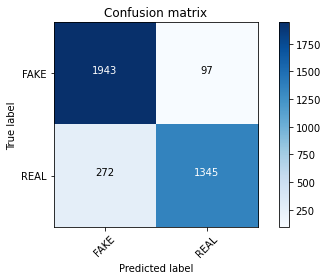

In [86]:
plot_confusion_matrix(cm, ['FAKE', 'REAL'])